In [2]:
import tweepy
import simplejson as json
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
from textblob import TextBlob
import pandas as pd
import re

In [4]:
# Credentials
consumer_key = 'Wgpn3qWoGPQTgEWsEMQh8r9mD'
consumer_secret = 'cQ2MuFTP7rYpa1U87ILoZ21y5uJaznqmRhWJbFACnKRtQHHjEX'
access_token = '2726706352-YyofT7VTjRKvY9jZvG8nP1Chqzp8PN3V9y1uvg0'
access_secret = 'U94tdlig7mhSCCFs48kmCRPNKl4NhTOOAB8rBflRJ9G5s'

# Authentication
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

print("Connected to Twitter!")

Connected to Twitter!


In [5]:
class MyListener(StreamListener):
    
    def __init__(self, api=None):
        super(StreamListener, self).__init__()
        self.num_tweets = 0

    def on_data(self, data):
        try:
            with open('jsonfile.json', 'a') as f:
                f.write(data) # This will store the whole JSON data in the file, you can perform some JSON filters
                twitter_text = json.loads(data)['text'] # You can also print your tweets here
                self.num_tweets += 1
                
                # Just to limit the number of tweets collected to check the 
                # program at the beginning, then increase the limit
                if self.num_tweets < 20: 
                    return True
                else:
                    return False
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True

 
    def on_error(self, status):
        print('Error :', status.place)
        return False
    
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(
    locations = [113.338953078, -43.6345972634, 153.569469029, -10.6681857235],
    track=["flushots","flu shots","flu shot","flushot","flu vaccine","#flushots","fluvaccine","#flushot"],
    languages=["en"]
) # Add your keywords and other filters

print('_______ End _______')



_______ End _______


In [6]:
# Create the CSV file
with open ("csvfile.csv", 'w', encoding="utf-8") as csv:
    
       # Write the title of the columns (features) that you want to store in the CSV file
        csv.write("selected_name," + "created_at," + "text," + 
                  "country," + 
                  "location," + 
                  "followers," +
                  "friends," + "listed_count," + "favourites_count," + "verified," + 
                  "statuses_count," + "contributors_enabled," + "profile_image_url," +"\n")
        
        # Copy the data from the JSON file
        with open('jsonfile.json', 'r') as jsonfile:
            for tweet in jsonfile:
                try:
                    data = json.loads(tweet)
                except:
                    continue
                # The int values should be converted to strings
                
                #csv.write(str(data["id"]) + ",")
                csv.write(str(data["user"]["name"]) + ",")
                csv.write(str(data["created_at"]) + ",")
                csv.write((str(data["text"]).replace("\n","").replace(",","")) + ",")
                if(data["place"] is None):
                    csv.write("Australia" + ",")
                else:
                    csv.write(str(data["place"]["country"]) + ",")
                
                if(data["place"] is None):
                    csv.write("General" + ",")
                else:
                    csv.write(str(data["place"]["name"]) + ",")
                    
                csv.write(str(data["user"]["followers_count"]) + ",")
                csv.write(str(data["user"]["friends_count"]) + ",")
                csv.write(str(data["user"]["listed_count"]) + ",")
                csv.write(str(data["user"]["favourites_count"]) + ",")
                csv.write(str(data["user"]["verified"]) + ",")
                csv.write(str(data["user"]["statuses_count"]) + ",")
                csv.write(str(data["user"]["contributors_enabled"]) + ",")
                csv.write(str(data["user"]["profile_image_url"]) + ",")
                #csv.write(str(data["user"][""]) + ",")
                #csv.write(str(data["user"][""]) + ",")
                #csv.write(str(data["user"][""]) + ",")
                #csv.write(str(data["user"][""]) + ",")
                
                # Write New User Data
                csv.write("\n")

In [7]:
# Display max columns text and not shorten
pd.set_option('display.max_colwidth', -1)

# Assign dataset into pandas 
tweets = pd.read_csv('csvfile.csv', index_col=0, encoding='ISO-8859-1', skiprows=0)

# Some column that snipped to our DF
del tweets['Unnamed: 13']

# Show first n columns from dataset 
tweets.head(100)

,created_at,text,country,location,followers,friends,listed_count,favourites_count,verified,statuses_count,contributors_enabled,profile_image_url
selected_name,,,,,,,,,,,,
Long-Island-Portal,Thu Jan 23 15:31:06 +0000 2020,The Poll: Did you get a flu shot this season? https://t.co/7b6teQd6yH https://t.co/53ptbH5GcT,Australia,General,12333,8341,194,0,False,90838,False,http://pbs.twimg.com/profile_images/449164520154345472/hJHHHsa4_normal.jpeg
Toto â Everything,Thu Jan 23 15:31:18 +0000 2020,@VodkaMuse You don't need to understand it respect everyone choices. I would not get the flu shot and I do get theâ¦ https://t.co/20zY1TBVXD,Australia,General,282,682,4,14487,False,1575,False,http://pbs.twimg.com/profile_images/1217859480634961926/PpN6AP7j_normal.jpg
ðð ð,Thu Jan 23 15:31:25 +0000 2020,@hazirah_razan omg go clinic pls. drink lots of water. get a flu shot. wash ur hands. drown urself in clorox.,Australia,General,16,31,0,138,False,554,False,http://pbs.twimg.com/profile_images/1213096363468058626/J_sZ3Nvi_normal.jpg
Alex Theodoridis,Thu Jan 23 15:31:33 +0000 2020,Will translate this tomorrow. Mikael was devastated after the match understandably so but gave us some very intereâ¦ https://t.co/5kxZadhqAZ,Australia,Melbourne,2104,4694,49,7266,False,21495,False,http://pbs.twimg.com/profile_images/1147257219358101504/GOEJHlLg_normal.jpg
Stevie Joe Payne,Thu Jan 23 15:31:33 +0000 2020,They just want to kill my wife and me and all of our age contemporaries. What's to understand?,United States,Bartlesville,7928,6760,9,69521,False,285820,False,http://pbs.twimg.com/profile_images/1214601742412894215/cHlQVRVT_normal.jpg
I'm Him,Thu Jan 23 15:32:03 +0000 2020,RT @TcatMPS: Yâall remember when that black doctor that worked for the CDC whistleblew that the flu shot was the actual cause of influenzaâ¦,Australia,General,1112,563,62,5759,False,345845,False,http://pbs.twimg.com/profile_images/1210590124926537728/1VCrI8kA_normal.jpg
Kateri,Thu Jan 23 15:32:24 +0000 2020,You know an article is bullshit when it starts out like this:âDoctors say theyâre completely safeâ#RiseUpâ¦ https://t.co/9HVA4QQk0I,Australia,General,2076,3123,6,47574,False,19826,False,http://pbs.twimg.com/profile_images/1144276762785976321/Kc3Utmdv_normal.jpg
Sanctimonious_Sinner ðð¥ [ONLYFANS],Thu Jan 23 15:32:28 +0000 2020,ðMy Sanctuary of Sin ðâ ï¸Subscriber incentives â ï¸â ï¸Lucky Drawsâ ï¸â ï¸Hundreds of filthâ ï¸â ï¸Constant uploads â ï¸â¼ï¸Subâ¦ https://t.co/GBA8NUplIg,Australia,Brisbane,3617,532,10,10616,False,1126,False,http://pbs.twimg.com/profile_images/1219689189945438208/OwwOYfi5_normal.jpg
Neikz22,Thu Jan 23 15:32:31 +0000 2020,@MLovetube Well thats 28secs ill not get back,Australia,Port Macquarie,157,997,2,3102,False,3502,False,http://pbs.twimg.com/profile_images/1210486596706811910/TLwtH3Z__normal.jpg


In [8]:
texts = []
texts=tweets["text"]
sents=[]
sents_name = []
for i in texts:
    pol=(TextBlob(i))
    sents.append(pol.sentiment.polarity)
    if (pol.sentiment.polarity) == 0:
        sents_name.append("Neutral")
    elif (pol.sentiment.polarity) > 0:
        sents_name.append("Positive")
    elif (pol.sentiment.polarity) < 0:
        sents_name.append("Negative")
# Using DataFrame.insert() to add the sentiment value as a column 
tweets.insert(2,"sentiment_values", sents, True) 
tweets.insert(3,"sentiment_name", sents_name, True) 

tweets

,created_at,text,sentiment_values,sentiment_name,country,location,followers,friends,listed_count,favourites_count,verified,statuses_count,contributors_enabled,profile_image_url
selected_name,,,,,,,,,,,,,,
Long-Island-Portal,Thu Jan 23 15:31:06 +0000 2020,The Poll: Did you get a flu shot this season? https://t.co/7b6teQd6yH https://t.co/53ptbH5GcT,0.000000,Neutral,Australia,General,12333,8341,194,0,False,90838,False,http://pbs.twimg.com/profile_images/449164520154345472/hJHHHsa4_normal.jpeg
Toto â Everything,Thu Jan 23 15:31:18 +0000 2020,@VodkaMuse You don't need to understand it respect everyone choices. I would not get the flu shot and I do get theâ¦ https://t.co/20zY1TBVXD,0.000000,Neutral,Australia,General,282,682,4,14487,False,1575,False,http://pbs.twimg.com/profile_images/1217859480634961926/PpN6AP7j_normal.jpg
ðð ð,Thu Jan 23 15:31:25 +0000 2020,@hazirah_razan omg go clinic pls. drink lots of water. get a flu shot. wash ur hands. drown urself in clorox.,0.000000,Neutral,Australia,General,16,31,0,138,False,554,False,http://pbs.twimg.com/profile_images/1213096363468058626/J_sZ3Nvi_normal.jpg
Alex Theodoridis,Thu Jan 23 15:31:33 +0000 2020,Will translate this tomorrow. Mikael was devastated after the match understandably so but gave us some very intereâ¦ https://t.co/5kxZadhqAZ,0.200000,Positive,Australia,Melbourne,2104,4694,49,7266,False,21495,False,http://pbs.twimg.com/profile_images/1147257219358101504/GOEJHlLg_normal.jpg
Stevie Joe Payne,Thu Jan 23 15:31:33 +0000 2020,They just want to kill my wife and me and all of our age contemporaries. What's to understand?,0.000000,Neutral,United States,Bartlesville,7928,6760,9,69521,False,285820,False,http://pbs.twimg.com/profile_images/1214601742412894215/cHlQVRVT_normal.jpg
I'm Him,Thu Jan 23 15:32:03 +0000 2020,RT @TcatMPS: Yâall remember when that black doctor that worked for the CDC whistleblew that the flu shot was the actual cause of influenzaâ¦,-0.083333,Negative,Australia,General,1112,563,62,5759,False,345845,False,http://pbs.twimg.com/profile_images/1210590124926537728/1VCrI8kA_normal.jpg
Kateri,Thu Jan 23 15:32:24 +0000 2020,You know an article is bullshit when it starts out like this:âDoctors say theyâre completely safeâ#RiseUpâ¦ https://t.co/9HVA4QQk0I,0.100000,Positive,Australia,General,2076,3123,6,47574,False,19826,False,http://pbs.twimg.com/profile_images/1144276762785976321/Kc3Utmdv_normal.jpg
Sanctimonious_Sinner ðð¥ [ONLYFANS],Thu Jan 23 15:32:28 +0000 2020,ðMy Sanctuary of Sin ðâ ï¸Subscriber incentives â ï¸â ï¸Lucky Drawsâ ï¸â ï¸Hundreds of filthâ ï¸â ï¸Constant uploads â ï¸â¼ï¸Subâ¦ https://t.co/GBA8NUplIg,0.000000,Neutral,Australia,Brisbane,3617,532,10,10616,False,1126,False,http://pbs.twimg.com/profile_images/1219689189945438208/OwwOYfi5_normal.jpg
Neikz22,Thu Jan 23 15:32:31 +0000 2020,@MLovetube Well thats 28secs ill not get back,-0.250000,Negative,Australia,Port Macquarie,157,997,2,3102,False,3502,False,http://pbs.twimg.com/profile_images/1210486596706811910/TLwtH3Z__normal.jpg


In [9]:
# in order to analyze in other platforms as well -> conversion from csv file into xlsx

read_file = tweets
read_file.to_excel (r'xlsxfile.xlsx', index = None, header=True)

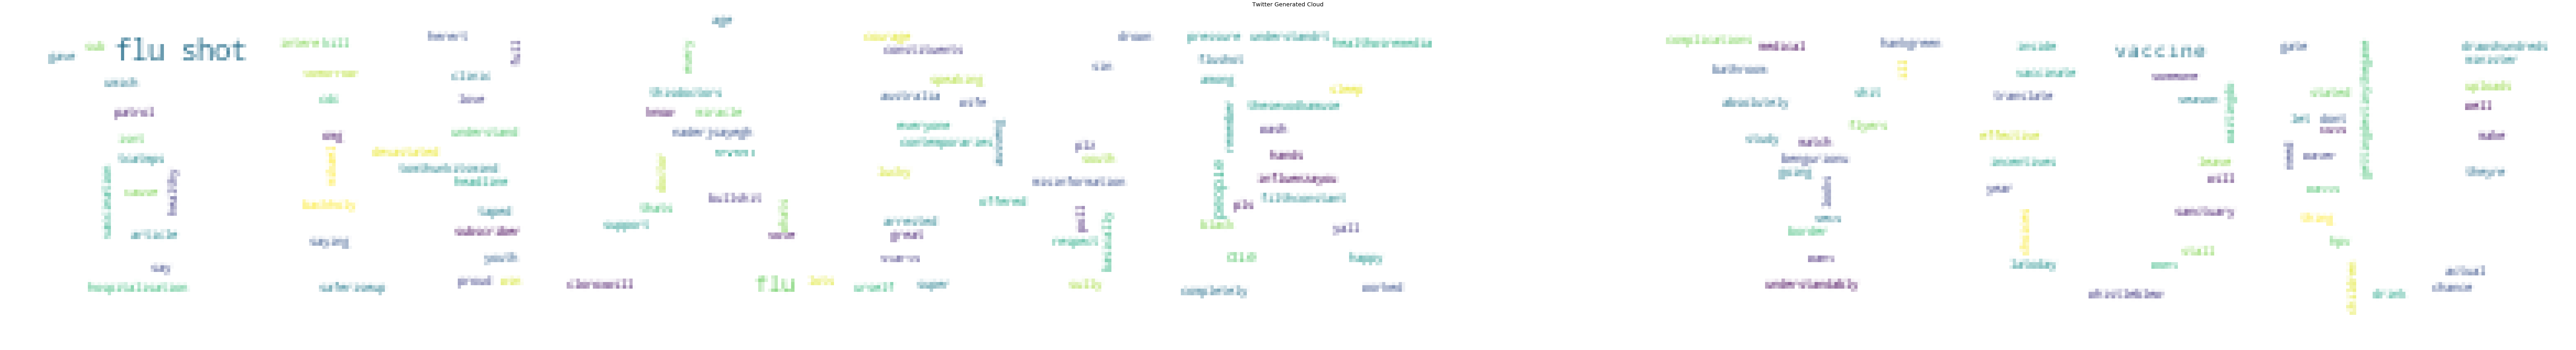

In [30]:
from wordcloud import WordCloud,STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

raw_tweets = tweets["text"]

#Create a string form of our list of text
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

mask = np.array(Image.open('/home/jony/Desktop/thank_you.jpeg'))



wc = WordCloud(background_color="white", max_words=2000, mask=mask)
clean_string = ','.join(words)
wc.generate(clean_string)


#f = plt.figure(figsize=(50,50))
#f.add_subplot(1,2, 1)
#plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.title('Original Stencil', size=40)
#plt.axis("off")

#f.add_subplot(1,2, 2)
#plt.imshow(wc, interpolation='bilinear')

plt.figure( figsize=(160,90) )
plt.imshow(wc)


plt.title('Twitter Generated Cloud', size=20)
plt.axis("off")
plt.show()